# Table of Contents
 <p><div class="lev1"><a href="#VISUALIZING-TEXT-DATA-USING-WORD-CLOUDS"><span class="toc-item-num">1&nbsp;&nbsp;</span>VISUALIZING TEXT DATA USING WORD CLOUDS</a></div><div class="lev2"><a href="#Problem-1.1---Preparing-the-Data"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem 1.1 - Preparing the Data</a></div><div class="lev2"><a href="#Problem-1.2---Preparing-the-Data"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Problem 1.2 - Preparing the Data</a></div><div class="lev3"><a href="#Explanation"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Explanation</a></div><div class="lev2"><a href="#Problem-2.1---Building-a-Word-Cloud"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Problem 2.1 - Building a Word Cloud</a></div><div class="lev2"><a href="#Problem-2.2---Building-a-Word-Cloud"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Problem 2.2 - Building a Word Cloud</a></div><div class="lev2"><a href="#Problem-2.3---Building-a-Word-Cloud"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Problem 2.3 - Building a Word Cloud</a></div><div class="lev2"><a href="#Problem-2.4---Building-a-Word-Cloud"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Problem 2.4 - Building a Word Cloud</a></div><div class="lev1"><a href="#PROBLEM-3---SIZE-AND-COLOR"><span class="toc-item-num">2&nbsp;&nbsp;</span>PROBLEM 3 - SIZE AND COLOR</a></div><div class="lev2"><a href="#Problem-3.1---Size-and-Color"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Problem 3.1 - Size and Color</a></div><div class="lev2"><a href="#Problem-3.2---Size-and-Color"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Problem 3.2 - Size and Color</a></div><div class="lev2"><a href="#Problem-3.3---Size-and-Color"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Problem 3.3 - Size and Color</a></div><div class="lev3"><a href="#Explanation"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Explanation</a></div><div class="lev2"><a href="#Problem-3.4---Size-and-Color"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Problem 3.4 - Size and Color</a></div><div class="lev3"><a href="#Explanation"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Explanation</a></div><div class="lev2"><a href="#Problem-3.5---Size-and-Color"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Problem 3.5 - Size and Color</a></div><div class="lev3"><a href="#Explanation"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Explanation</a></div><div class="lev2"><a href="#Problem-4.1---Selecting-a-Color-Palette"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Problem 4.1 - Selecting a Color Palette</a></div><div class="lev3"><a href="#Explanation"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Explanation</a></div><div class="lev2"><a href="#Problem-4.2---Selecting-a-Color-Palette"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Problem 4.2 - Selecting a Color Palette</a></div><div class="lev2"><a href="#Problem-4.3---Selecting-a-Color-Palette"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Problem 4.3 - Selecting a Color Palette</a></div><div class="lev3"><a href="#Explanation"><span class="toc-item-num">2.8.1&nbsp;&nbsp;</span>Explanation</a></div>

VISUALIZING TEXT DATA USING WORD CLOUDS
=======================================

Earlier in the course, we used text analytics as a predictive tool, using word frequencies as independent variables in our models. However, sometimes our goal is to understand commonly occurring topics in text data instead of to predict the value of some dependent variable. In such cases, word clouds can be a visually appealing way to display the most frequent words in a body of text.

A word cloud arranges the most common words in some text, using size to indicate the frequency of a word. For instance, this is a word cloud for the complete works of Shakespeare, removing English stopwords:

![Shakespeare word cloud](https://d37djvu3ytnwxt.cloudfront.net/assets/courseware/v1/2bd6d8dcc2baba7912599f3e59ae1b1b/asset-v1:MITx+15.071x_3+1T2016+type@asset+block/shakespeare.png)

While we could generate word clouds using free generators available on the Internet, we will have more flexibility and control over the process if we do so in R. We will visualize the text of tweets about Apple, a dataset we used earlier in the course. As a reminder, this dataset (which can be downloaded from tweets.csv) has the following variables:

**Tweet** -- the text of the tweet

**Avg** -- the sentiment of the tweet, as assigned by users of Amazon Mechanical Turk. The score ranges on a scale from -2 to 2, where 2 means highly positive sentiment, -2 means highly negative sentiment, and 0 means neutral sentiment.

## Problem 1.1 - Preparing the Data

Download the dataset "tweets.csv", and load it into a data frame called "tweets" using the read.csv() function, remembering to use stringsAsFactors=FALSE when loading the data.

Next, perform the following pre-processing tasks (like we did in Unit 5), noting that we don't stem the words in the document or remove sparse terms:

- 1) Create a corpus using the Tweet variable

- 2) Convert the corpus to lowercase (don't forget to type "corpus = tm_map(corpus, PlainTextDocument)" in your R console right after this step)

- 3) Remove punctuation from the corpus

- 4) Remove all English-language stopwords

- 5) Build a document-term matrix out of the corpus

- 6) Convert the document-term matrix to a data frame called allTweets

How many unique words are there across all the documents?

In [7]:
library(tm)
tweets = read.csv("tweets.csv", stringsAsFactors=FALSE)
corpus = Corpus(VectorSource(tweets$Tweet))
corpus = tm_map(corpus, tolower)
corpus = tm_map(corpus, PlainTextDocument)
corpus = tm_map(corpus, removePunctuation)
corpus = tm_map(corpus, removeWords, stopwords("english"))
frequencies = DocumentTermMatrix(corpus)
allTweets = as.data.frame(as.matrix(frequencies))

In [8]:
ncol(allTweets)

[1] 3780

There are 3780 unique words across all the tweets

## Problem 1.2 - Preparing the Data

Although we typically stem words during the text preprocessing step, we did not do so here. What is the most compelling rationale for skipping this step when visualizing text data?


- It avoids the computational burden of stemming
- It will be easier to read and understand the word cloud if it includes full words instead of just the word stems
- We would not be able to create a word cloud if we stemmed the document

### Explanation
We want to create an interpretable display of a document's contents, and our results will be easier to read if they include full words instead of just the stems.
Stemming has relatively minor computational burden, and we certainly could create a word cloud with a stemmed document.

## Problem 2.1 - Building a Word Cloud

Install and load the "wordcloud" package, which is needed to build word clouds.

As we can read from ?wordcloud, we will need to provide the function with a vector of words and a vector of word frequencies. Which function can we apply to allTweets to get a vector of the words in our dataset, which we'll pass as the first argument to wordcloud()?

- str
- rownames
- colnames

In [13]:
library(wordcloud)
?wordcloud

Warning message:
"package 'wordcloud' was built under R version 3.3.2"Loading required package: RColorBrewer


Each tweet represents a row of allTweets, and each word represents a column. We need the names of all the columns of allTweets, which is returned by colnames(allTweets). While str(allTweets) displays the names of the variables along with other information, it doesn't return a vector that we can use as the first argument to wordcloud().

## Problem 2.2 - Building a Word Cloud

Which function should we apply to allTweets to obtain the frequency of each word across all tweets?

- colSums
- rowSums
- sum

Each tweet represents a row in allTweets, and each word represents a column. Therefore, we need to access the sums of each column in allTweets, which is returned by colSums(allTweets).

## Problem 2.3 - Building a Word Cloud

Use allTweets to build a word cloud. Make sure to check out the help page for wordcloud if you are not sure how to do this.

Because we are plotting a large number of words, you might get warnings that some of the words could not be fit on the page and were therefore not plotted -- this is especially likely if you are using a smaller screen. You can address these warnings by plotting the words smaller. From ?wordcloud, we can see that the "scale" parameter controls the sizes of the plotted words. By default, the sizes range from 4 for the most frequent words to 0.5 for the least frequent, as denoted by the parameter "scale=c(4, 0.5)". We could obtain a much smaller plot with, for instance, parameter "scale=c(2, 0.25)".

What is the most common word across all the tweets (it will be the largest in the outputted word cloud)? The most frequent word might not be printed if you got a warning about words being cut off -- if this happened, be sure to follow the instructions in the paragraph above.

In [14]:
words <- colnames(allTweets)
freq <- colSums(allTweets)

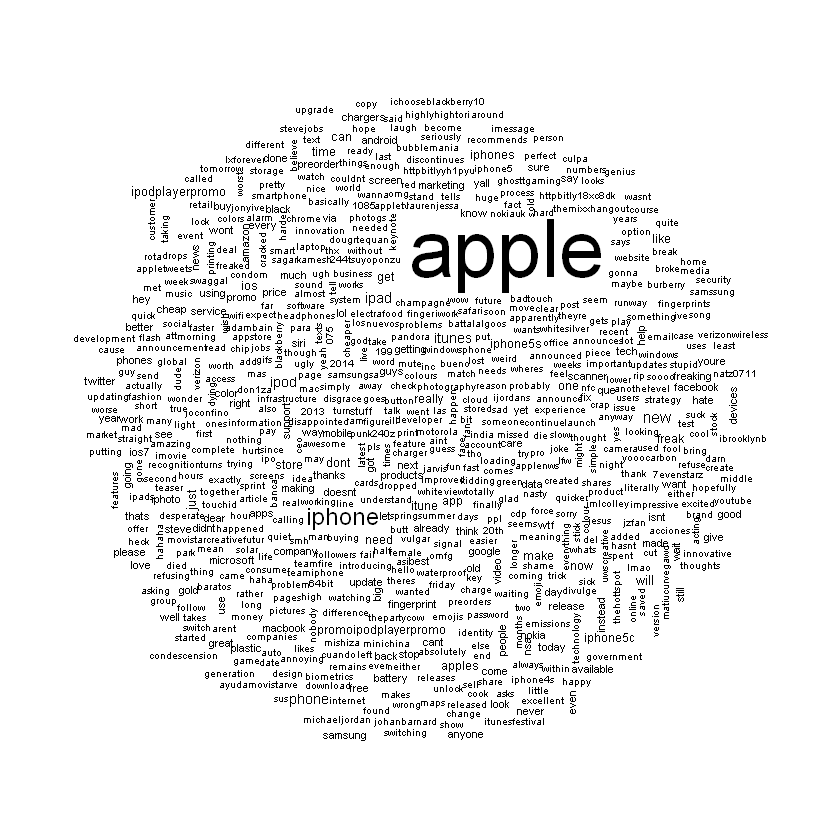

In [15]:
wc <- wordcloud(words, freq)

$\Rightarrow$ apple.

## Problem 2.4 - Building a Word Cloud

In the previous subproblem, we noted that there is one word with a much higher frequency than the other words. Repeat the steps to load and pre-process the corpus, this time removing the most frequent word in addition to all elements of stopwords("english") in the call to tm_map with removeWords. For a refresher on how to remove this additional word, see the Twitter text analytics lecture.

Replace allTweets with the document-term matrix of this new corpus -- we will use this updated corpus for the remainder of the assignment.

Create a word cloud with the updated corpus. What is the most common word in this new corpus (the largest word in the outputted word cloud)? The most frequent word might not be printed if you got a warning about words being cut off -- if this happened, be sure to follow the instructions in the previous problem.

In [16]:
tweets = read.csv("tweets.csv", stringsAsFactors=FALSE)
corpus = Corpus(VectorSource(tweets$Tweet))
corpus = tm_map(corpus, tolower)
corpus = tm_map(corpus, PlainTextDocument)
corpus = tm_map(corpus, removePunctuation)
corpus = tm_map(corpus, removeWords, stopwords("english"))
corpus = tm_map(corpus, removeWords, c("apple"))
frequencies = DocumentTermMatrix(corpus)
allTweets = as.data.frame(as.matrix(frequencies))

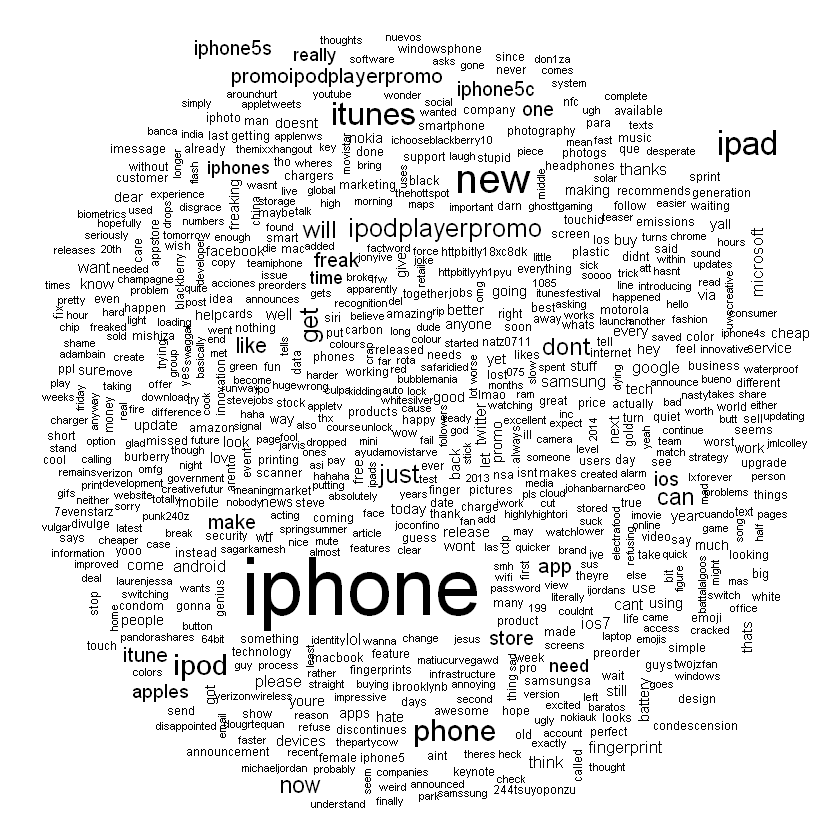

In [17]:
words <- colnames(allTweets)
freq <- colSums(allTweets)
wc <- wordcloud(words, freq)

$\Rightarrow$ iphone.

# PROBLEM 3 - SIZE AND COLOR

So far, the word clouds we've built have not been too visually appealing -- they are crowded by having too many words displayed, and they don't take advantage of color. One important step to building visually appealing visualizations is to experiment with the parameters available, which in this case can be viewed by typing ?wordcloud in your R console. In this problem, you should look through the help page and experiment with different parameters to answer the questions.

Below are four word clouds, each of which uses different parameter settings in the call to the wordcloud() function:

Word cloud A :

![Word cloud A](https://d37djvu3ytnwxt.cloudfront.net/assets/courseware/v1/d36ba1a22178ea9647564dbed85b457d/asset-v1:MITx+15.071x_3+1T2016+type@asset+block/wordcloudA.png)

Word cloud B :

![Word cloud B](https://d37djvu3ytnwxt.cloudfront.net/assets/courseware/v1/d7535e6d20f2dd98eaed7ab89dbf9e63/asset-v1:MITx+15.071x_3+1T2016+type@asset+block/wordcloudB.png)

Word cloud C :

![Word cloud C](https://d37djvu3ytnwxt.cloudfront.net/assets/courseware/v1/cf2ad50d50ab7381e10378c22c12092a/asset-v1:MITx+15.071x_3+1T2016+type@asset+block/wordcloudC.png)

Word cloud D :

![Word cloud D](https://d37djvu3ytnwxt.cloudfront.net/assets/courseware/v1/1f5a0309787449456bf0d57be22e2815/asset-v1:MITx+15.071x_3+1T2016+type@asset+block/wordcloudD.png)

## Problem 3.1 - Size and Color

Which word cloud is based only on the negative tweets (tweets with Avg value -1 or less)?

Word Cloud C is the only one with a different distribution of the most frequent words -- negative words (or censored versions of negative words) are much more common in this cloud.

It is quite simple to obtain a word cloud that is limited to a subset of the tweets using the subset function:

- negativeTweets = subset(allTweets, tweets$Avg <= -1)
- wordcloud(colnames(negativeTweets), colSums(negativeTweets))

## Problem 3.2 - Size and Color

Only one word cloud was created without modifying parameters min.freq or max.words. Which word cloud is this?

min.freq and max.words are parameters that can be used to remove the least frequent words, resulting is a less cluttered word cloud. Word Cloud A is much more cluttered than the others because it did not use either of these parameters, and therefore is displaying every word that appears more than 3 times.

## Problem 3.3 - Size and Color

Which word clouds were created with parameter random.order set to FALSE?

In [19]:
?wordcloud

### Explanation

If random.order is set to FALSE, then the most frequent (largest) words will be plotted first, resulting in them being displayed together in the center of the word cloud. This is the case in Word Cloud B and Word Cloud D.

## Problem 3.4 - Size and Color

Which word cloud was built with a non-default value for parameter rot.per?

### Explanation
rot.per controls the proportion of words that are rotated to be vertical in the word cloud. By default 10% of words are rotated. However in Word Cloud A a much higher proportion (50%) are rotated, which was achieved by setting rot.per=0.5.

## Problem 3.5 - Size and Color

In Word Cloud C and Word Cloud D, we provided a color palette ranging from light purple to dark purple as the parameter colors (you will learn how to make such a color palette later in this assignment). For which word cloud was the parameter random.color set to TRUE?

### Explanation

When random.color is set to TRUE, the words will be colored randomly. This is the case in Word Cloud D. Meanwhile, colors were assigned based on the number of appearances in Word Cloud C.

## Problem 4.1 - Selecting a Color Palette

The use of a palette of colors can often improve the overall effect of a visualization. We can easily select our own colors when plotting; for instance, we could pass c("red", "green", "blue") as the colors parameter to wordcloud(). The RColorBrewer package, which is based on the ColorBrewer project (colorbrewer.org), provides pre-selected palettes that can lead to more visually appealing images. Though these palettes are designed specifically for coloring maps, we can also use them in our word clouds and other visualizations.

Begin by installing and loading the "RColorBrewer" package. This package may have already been installed and loaded when you installed and loaded the "wordcloud" package, in which case you don't need to go through this additional installation step. If you obtain errors (for instance, "Error: lazy-load database 'P' is corrupt") after installing and loading the RColorBrewer package and running some of the commands, try closing and re-opening R.

The function brewer.pal() returns color palettes from the ColorBrewer project when provided with appropriate parameters, and the function display.brewer.all() displays the palettes we can choose from.

Which color palette would be most appropriate for use in a word cloud for which we want to use color to indicate word frequency?

In [23]:
library(RColorBrewer)

In [24]:
display.brewer.all()

Warning message in eval(expr, envir, enclos):
"redémarrage de l'évaluation d'une promesse interrompue"Warning message in eval(expr, envir, enclos):
"internal error -3 in R_decompress1"

ERROR: Error in eval(expr, envir, enclos): lazy-load database 'C:/Users/Mehdi/Anaconda3/R/library/RColorBrewer/R/RColorBrewer.rdb' is corrupt


### Explanation

From ?brewer.pal we read that Accent and Set2 are both "qualitative palettes," which means color changes don't imply a change in magnitude (we can also see this in the output of display.brewer.all). As a result, the colors selected would not visually identify the least and most frequent words.
On the other hand, YlOrRd is a "sequential palette," with earlier colors begin lighter and later colors being darker. Therefore, it is a good palette choice for indicating low-frequency vs. high-frequency words.

## Problem 4.2 - Selecting a Color Palette

Which RColorBrewer palette name would be most appropriate to use when preparing an image for a document that must be in grayscale?

$\Rightarrow$ As we can see from display.brewer.all(), palette "Greys" is the only one completely in grayscale.

## Problem 4.3 - Selecting a Color Palette

In sequential palettes, sometimes there is an undesirably large contrast between the lightest and darkest colors. You can see this effect when plotting a word cloud for allTweets with parameter colors=brewer.pal(9, "Blues"), which returns a sequential blue palette with 9 colors.

Which of the following commands addresses this issue by removing the first 4 elements of the 9-color palette of blue colors? Select all that apply.

### Explanation

The fourth option limits to elements 5-9, which removes the first four. The second option uses negative indexes, which means remove elements 1-4. The first and third options actually keep colors 1-4, discarding the rest.

A shorthand for this indexing is:
- brewer.pal(9, "Blues")[-1:-4]
- brewer.pal(9, "Blues")[5:9]